In [1]:
from API import *
import warnings
warnings.filterwarnings('ignore')

# Exercice 1

### Question 2

In [2]:
DTC = DecisionTreeClassifier(max_depth=5)
GNB = GaussianNB()
KNC = KNeighborsClassifier(n_neighbors=1)

classifieurs = [DTC, GNB, KNC]

### Question 3

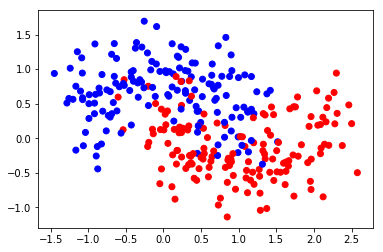

In [3]:
# génère des données synthétiques, deux classes sous formes de croissants de lunes
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=11)
plt.scatter(Y[:,0],Y[:,1],c=c,cmap=plt.cm.bwr)

### Question 4

In [4]:
plis = generer_plis(300,5)

### Question 5

In [5]:
# Calul du score de cross validation
scores = calcul_score(classifieurs, plis, Y, c)
print(scores)

[[0.88333333 0.83333333 0.88333333]
 [0.86666667 0.8        0.81666667]
 [0.83333333 0.83333333 0.88333333]
 [0.85       0.85       0.8       ]
 [0.86666667 0.85       0.86666667]]


### Question 6

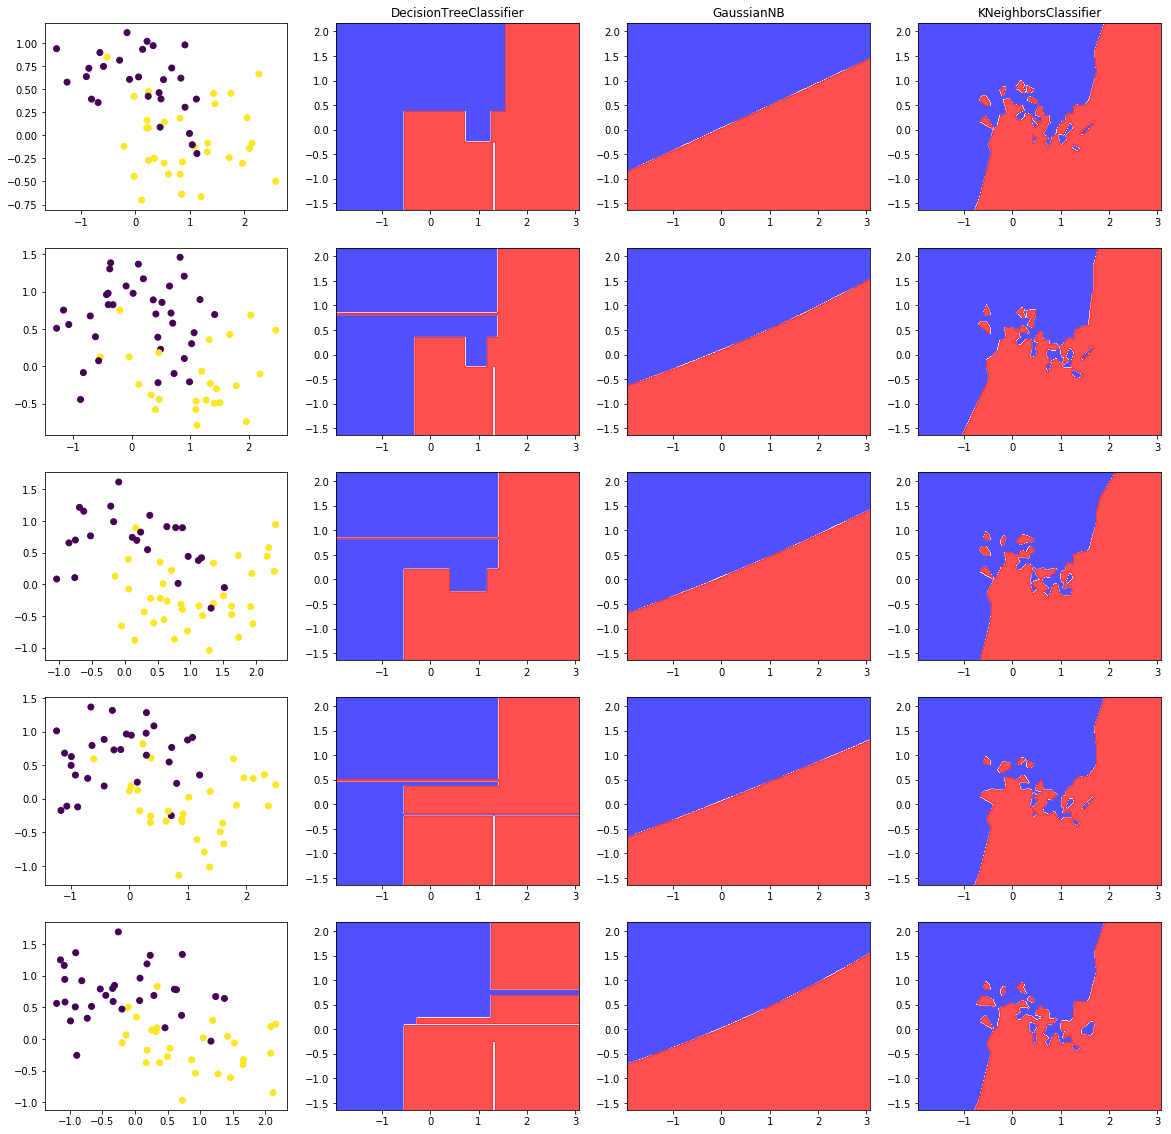

In [6]:
afficher_crossval(classifieurs, Y, c, plis)

### Question 7

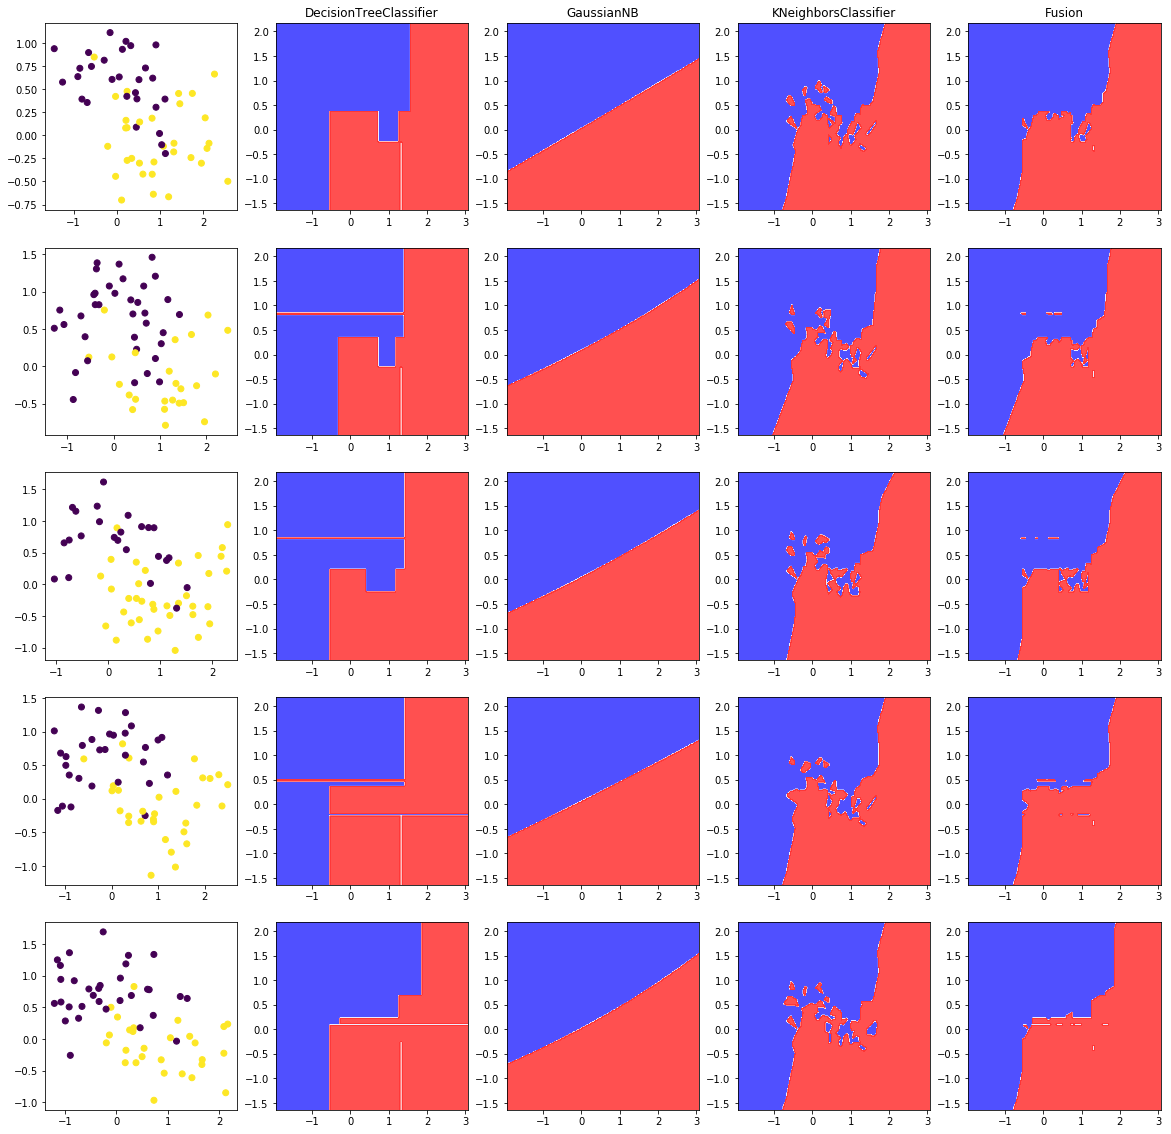

In [7]:
afficher_crossval(classifieurs, Y, c, plis, with_fusion=True, fusion_class = fusion_vote_maj_binary)

### Question 8

In [8]:
# Calul du score de cross validation
scores = calcul_score(classifieurs, plis, Y, c, with_fusion=True, fusion_class=fusion_vote_maj_binary)
print(scores)

[[0.88333333 0.83333333 0.88333333 0.95416667]
 [0.86666667 0.8        0.81666667 0.95833333]
 [0.83333333 0.83333333 0.88333333 0.96666667]
 [0.85       0.85       0.8        0.925     ]
 [0.86666667 0.85       0.86666667 0.95      ]]


### Question 9

In [9]:
classifieurs = [DTC, GNB, KNC]
n = 1000
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=1)
scores = calcul_score(classifieurs, plis, Y, c, with_fusion=True, fusion_class=fusion_vote_maj_binary)
for i in range(2,n):
    print(f"avancée {i/n*100:.2f}%", flush=True, end='\r')
    (Y,c) = make_moons(n_samples=300,noise=0.3, random_state=i)
    scores = np.vstack((scores,calcul_score(classifieurs, plis, Y, c, with_fusion=True, fusion_class=fusion_vote_maj_binary)))

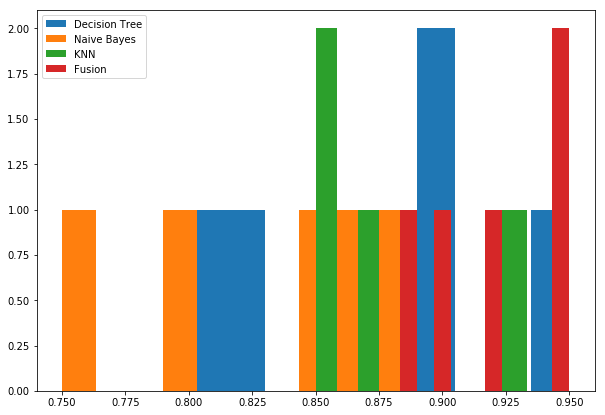

In [37]:
plt.figure(figsize=(10,7))
plt.hist(scores[:,0], label="Decision Tree" );
plt.hist(scores[:,1], label="Naive Bayes" );
plt.hist(scores[:,2], label="KNN" );
plt.hist(scores[:,3], label= "Fusion");
plt.legend();

In [38]:
print(f"écart type de Decision Tree = {scores[:,0].std()}")
print(f"écart type de Naive Bayes = {scores[:,1].std()}")
print(f"écart type de KNN = {scores[:,2].std()}")
print(f"écart type de Fusion = {scores[:,3].std()}")

écart type de Decision Tree = 0.05637178175095919
écart type de Decision Tree = 0.05637178175095919
écart type de Decision Tree = 0.05637178175095919


### Question 10

In [11]:
from sklearn.neural_network import MLPClassifier
best_clf = MLPClassifier(hidden_layer_sizes=(100,35),activation='relu',alpha=1e-8,max_iter=1000)
scores = calcul_score([best_clf], plis, Y, c)
scores

array([[0.88333333],
       [0.98333333],
       [0.91666667],
       [0.91666667],
       [0.88333333]])

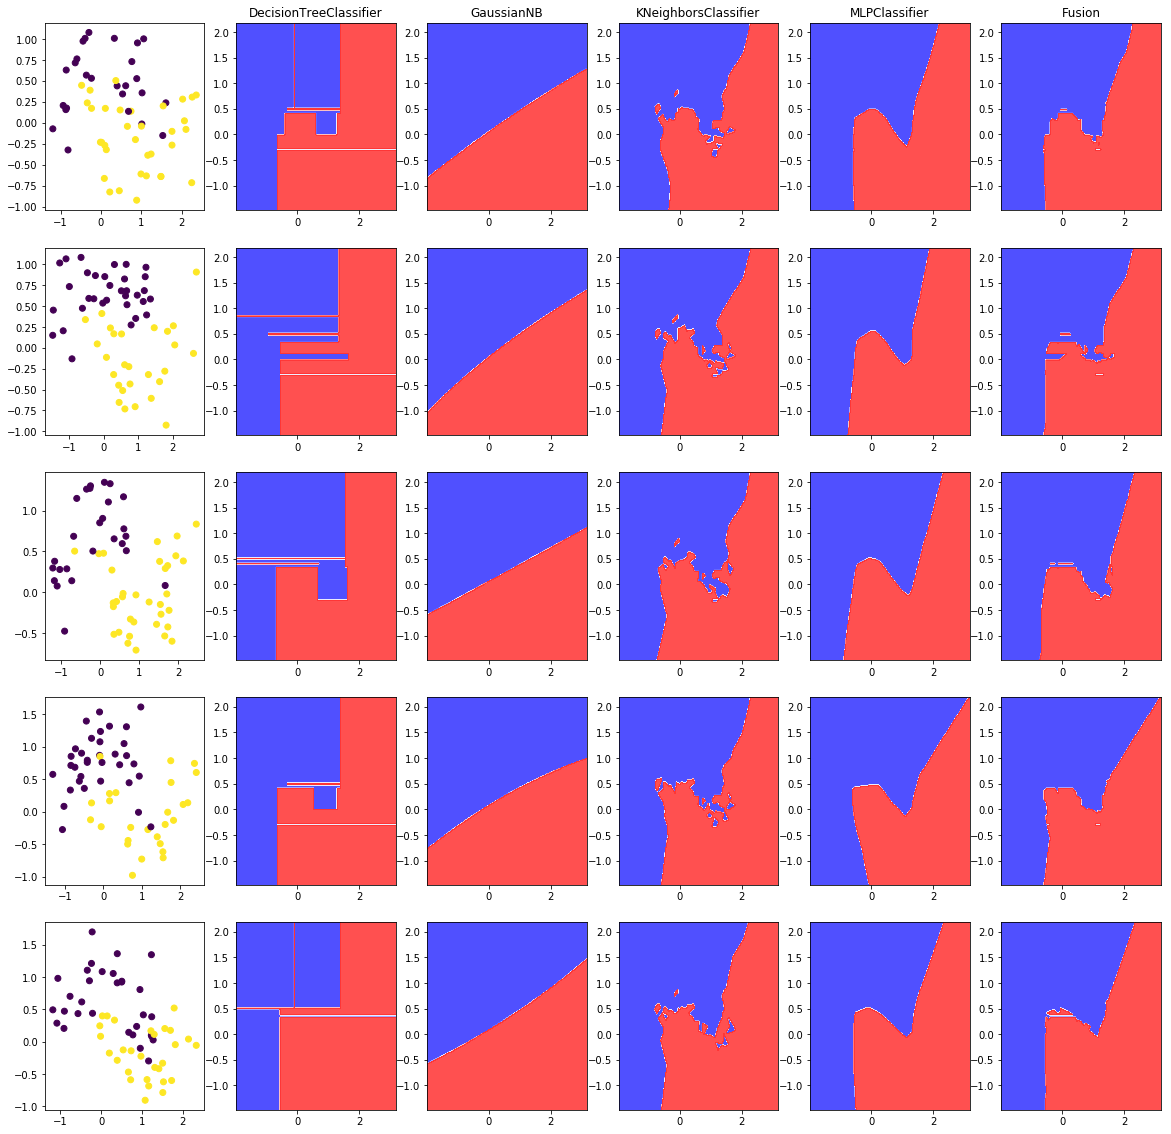

In [12]:
# Calul du score de cross validation
classifieurs = np.array([DTC, GNB, KNC,best_clf])
afficher_crossval(classifieurs, Y, c, plis, with_fusion=True, fusion_class = fusion_vote_maj_binary)

In [13]:
scores = calcul_score(classifieurs, plis, Y, c, with_fusion=True, fusion_class=fusion_vote_maj_binary)
print(scores)

[[0.9        0.8        0.85       0.9        0.975     ]
 [0.9        0.85       0.93333333 0.95       0.95      ]
 [0.81666667 0.88333333 0.85       0.91666667 0.96666667]
 [0.95       0.86666667 0.91666667 0.95       0.95833333]
 [0.8        0.75       0.86666667 0.88333333 0.95416667]]


# Exercice 2

### Question 1

In [14]:
DTC = DecisionTreeClassifier(max_depth=5)
GNB = GaussianNB()
KNC = KNeighborsClassifier(n_neighbors=1)
DTC_faible = DecisionTreeClassifier(max_depth=1)


classifieurs = [DTC, GNB, KNC, DTC_faible]

In [25]:
scores = calcul_score(classifieurs, plis, Y, c)

[[0.81666667 0.85       0.85416667 0.80833333]
 [0.79166667 0.83333333 0.8125     0.6625    ]
 [0.82916667 0.84583333 0.82916667 0.80833333]
 [0.8        0.81666667 0.83333333 0.75416667]
 [0.80833333 0.85416667 0.82083333 0.79166667]]


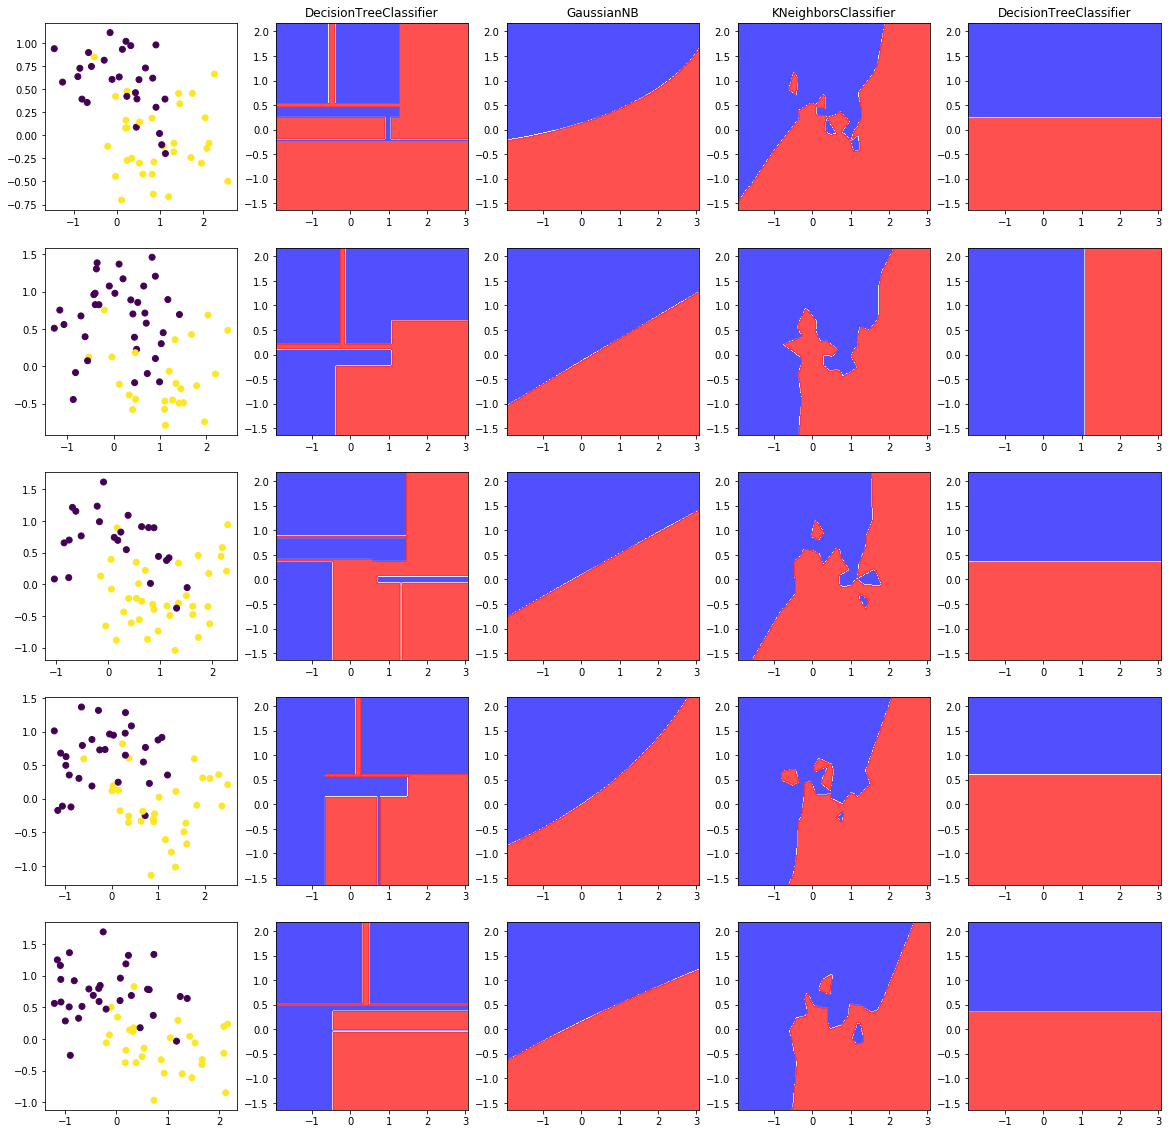

In [26]:
afficher_crossval(classifieurs, Y, c, plis)

### Question 2

In [108]:
class fusion_vote_maj_binary():
    """Cette classe implémente un vote majoritaire entre différents classifieurs;
    implémente un interface scikitlearn
    """
    def __init__(self, list_classifieur, pondere = False, ponderations = None, is_train = False):
        """
        parametres:
        list_class : Liste des classifieurs qui compose la fusion
        is_train : booléen qui indique si les classifieurs de la liste sont déjà entraîné"""
        self.list_class = list_classifieur
        self.n = len(list_classifieur)
        self.is_train = is_train
        if not pondere:
            self.ponde = np.ones(self.n)
        else :
            self.ponde = ponderations
        
    def fit(self, X, y):
        """entraîne les différents classifieurs de la fusion"""
        if self.is_train:
            pass
        for i in range(self.n):
            self.list_class[i].fit(X, y)
        self.is_train = True
            
    def predict(self, X):
        """ prédit la classe des données en entrées selon un vote majoritaire"""
        assert self.is_train, "is not trained"
        prediction = np.zeros(X.shape[0])
        # On additionne les vote
        
        prediction = np.sum(list(map((lambda pond,clf : pond*clf.predict(X)), self.ponde, self.list_class)), axis = 0)/np.sum(self.ponde)
        return (prediction > .5).astype(int) # On test si la majorité absolue est atteinte
    
    def score(self, X, y):
        """score de précision"""
        return (self.predict(X)==y).mean()

#### Vote majoritaire

In [109]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
scores = np.zeros((n_plis, n_classifieurs + 1))
for i in range(n_plis):
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
            scores[i,k] = clf.score(Y[plis_niv1==i],c[plis_niv1==i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = False, is_train=True)
    scores[i,n_classifieurs] = fusion.score(Y[plis_niv1==i],c[plis_niv1==i])
scores

array([[0.9       , 0.8       , 0.85      , 0.78333333, 0.88333333],
       [0.9       , 0.85      , 0.93333333, 0.88333333, 0.91666667],
       [0.81666667, 0.88333333, 0.85      , 0.71666667, 0.85      ],
       [0.95      , 0.86666667, 0.91666667, 0.81666667, 0.91666667],
       [0.8       , 0.75      , 0.86666667, 0.71666667, 0.83333333]])

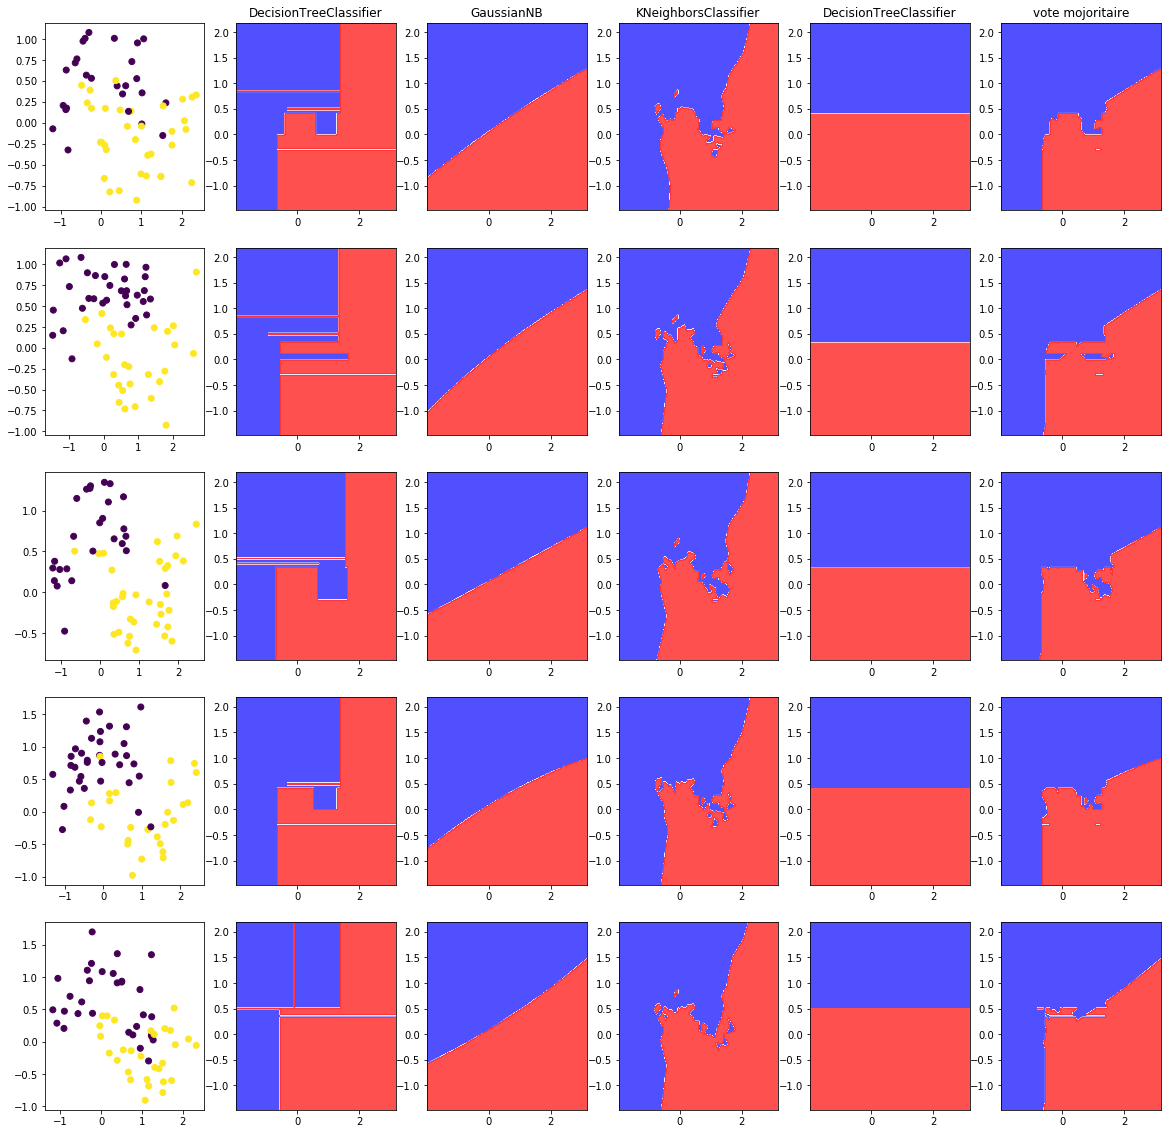

In [110]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
plt.figure(figsize=(20,20))
for i in range(n_plis):
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,0),(n_plis,n_classifieurs +1 +1)) + 1)
    plt.scatter(Y[:,0][plis==i],Y[:,1][plis==i],c=c[plis==i])
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = False, is_train=True)
    # parcourt des plis
        # On affiche les données d'entraînement

    # parcourt des classifieurs
    for j in range(n_classifieurs):
        classifieurs[j].fit(Y[plis!=i],c[plis!=i])
        plt.subplot(n_plis, n_classifieurs +1+1,np.ravel_multi_index((i,j+1),(n_plis,n_classifieurs +1+1)) + 1)
        afficher(classifieurs[j], Y)
        if i == 0:
            plt.title(str(classifieurs[j]).split('(')[0])
    # frontière de décision de la fusion
    fusion = fusion_class(list(classifieurs), is_train=True)
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,n_classifieurs +1),(n_plis,n_classifieurs +1 +1)) + 1)
    afficher(fusion, Y)
    if i == 0:
            plt.title("vote mojoritaire")

### Vote pondéré

In [111]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
scores = np.zeros((n_plis, n_classifieurs + 1))
for i in range(n_plis):
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
            scores[i,k] = clf.score(Y[plis_niv1==i],c[plis_niv1==i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(wi), is_train=True)
    scores[i,n_classifieurs] = fusion.score(Y[plis_niv1==i],c[plis_niv1==i])
scores

array([[0.9       , 0.8       , 0.85      , 0.78333333, 0.88333333],
       [0.9       , 0.85      , 0.93333333, 0.88333333, 0.91666667],
       [0.8       , 0.88333333, 0.85      , 0.71666667, 0.85      ],
       [0.95      , 0.86666667, 0.91666667, 0.81666667, 0.93333333],
       [0.8       , 0.75      , 0.86666667, 0.71666667, 0.83333333]])

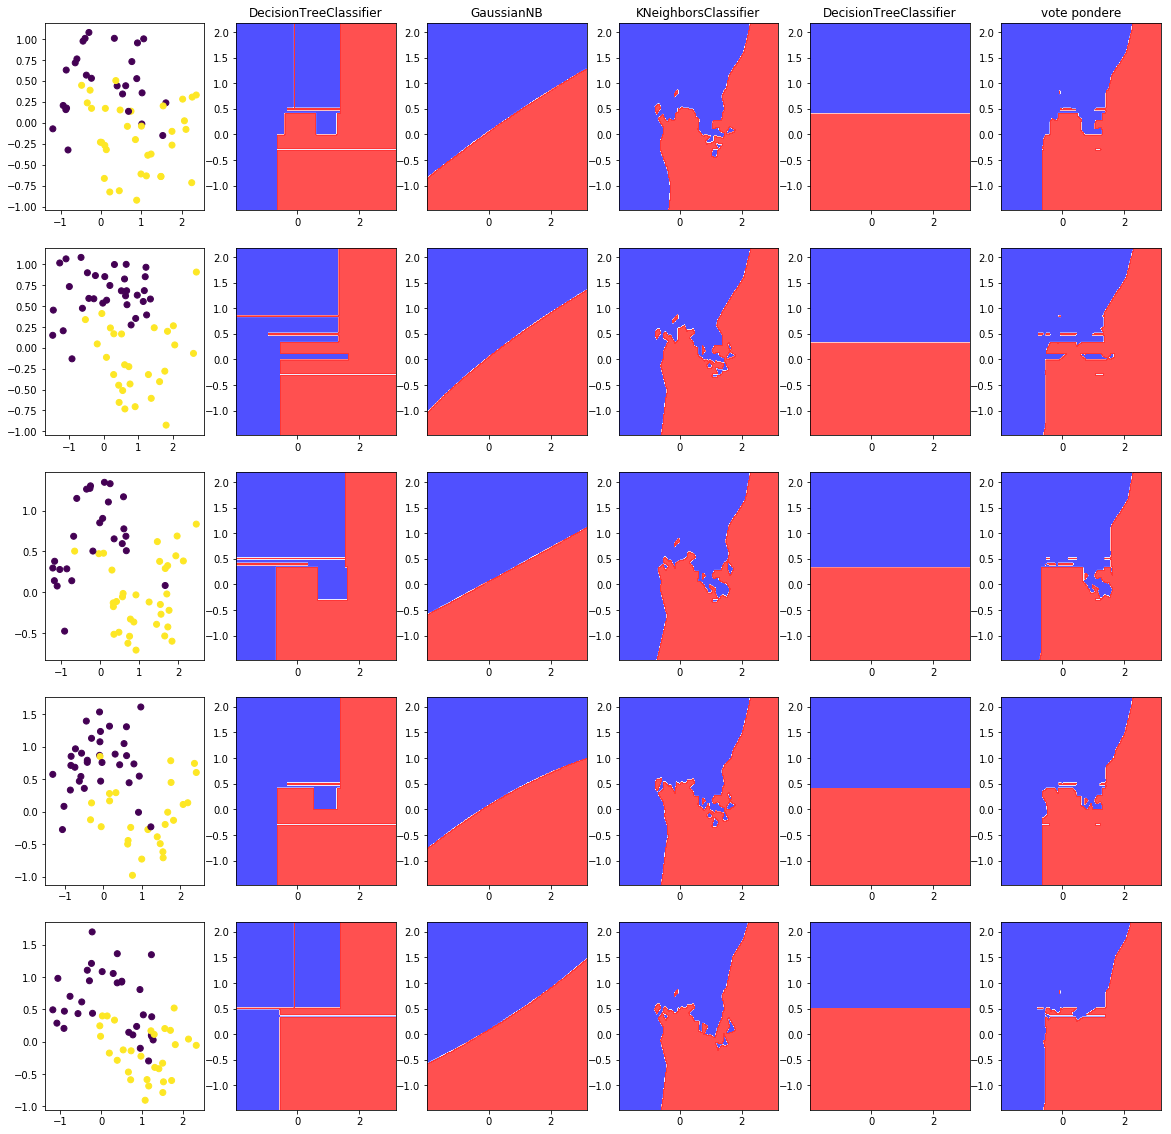

In [112]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
plt.figure(figsize=(20,20))
for i in range(n_plis):
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,0),(n_plis,n_classifieurs +1 +1)) + 1)
    plt.scatter(Y[:,0][plis==i],Y[:,1][plis==i],c=c[plis==i])
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = False, is_train=True)
    # parcourt des plis
        # On affiche les données d'entraînement

    # parcourt des classifieurs
    for j in range(n_classifieurs):
        classifieurs[j].fit(Y[plis!=i],c[plis!=i])
        plt.subplot(n_plis, n_classifieurs +1+1,np.ravel_multi_index((i,j+1),(n_plis,n_classifieurs +1+1)) + 1)
        afficher(classifieurs[j], Y)
        if i == 0:
            plt.title(str(classifieurs[j]).split('(')[0])
    # frontière de décision de la fusion
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(wi), is_train=True)
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,n_classifieurs +1),(n_plis,n_classifieurs +1 +1)) + 1)
    afficher(fusion, Y)
    if i == 0:
            plt.title("vote pondere")

### Question 4

In [113]:
def softmax(wi,r):
    expwi = np.exp(r*wi)
    return expwi/expwi.sum()

In [114]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
scores = np.zeros((n_plis, n_classifieurs + 1))
r = 15
for i in range(n_plis):
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
            scores[i,k] = clf.score(Y[plis_niv1==i],c[plis_niv1==i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(softmax(wi,r)), is_train=True)
    scores[i,n_classifieurs] = fusion.score(Y[plis_niv1==i],c[plis_niv1==i])
scores

array([[0.9       , 0.8       , 0.85      , 0.78333333, 0.88333333],
       [0.9       , 0.85      , 0.93333333, 0.88333333, 0.91666667],
       [0.81666667, 0.88333333, 0.85      , 0.71666667, 0.85      ],
       [0.95      , 0.86666667, 0.91666667, 0.81666667, 0.93333333],
       [0.8       , 0.75      , 0.86666667, 0.71666667, 0.8       ]])

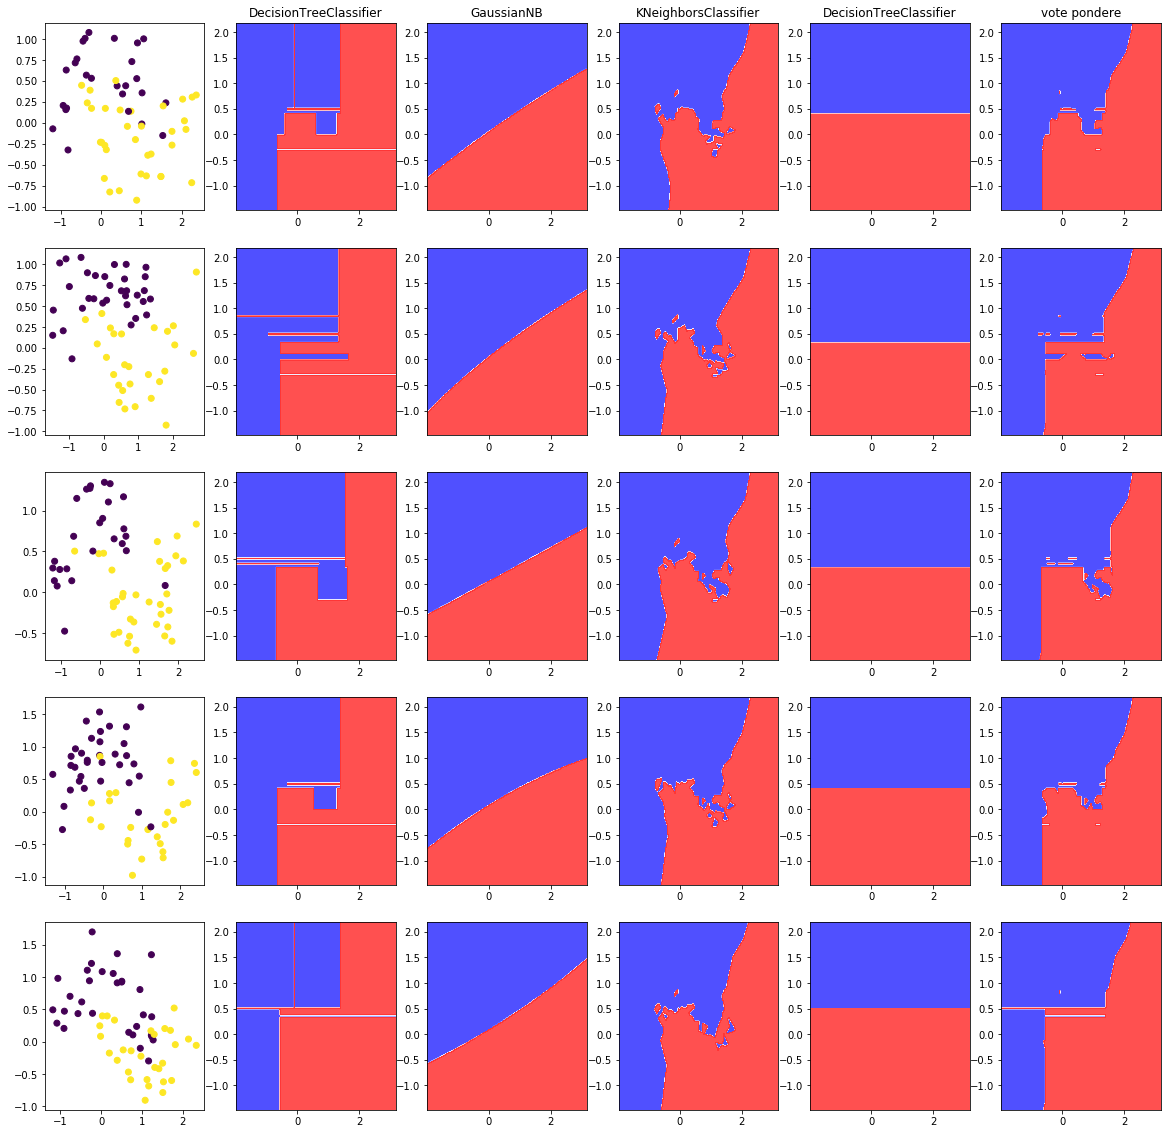

In [115]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
plt.figure(figsize=(20,20))
r = 15
for i in range(n_plis):
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,0),(n_plis,n_classifieurs +1 +1)) + 1)
    plt.scatter(Y[:,0][plis==i],Y[:,1][plis==i],c=c[plis==i])
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = False, is_train=True)
    # parcourt des plis
        # On affiche les données d'entraînement

    # parcourt des classifieurs
    for j in range(n_classifieurs):
        classifieurs[j].fit(Y[plis!=i],c[plis!=i])
        plt.subplot(n_plis, n_classifieurs +1+1,np.ravel_multi_index((i,j+1),(n_plis,n_classifieurs +1+1)) + 1)
        afficher(classifieurs[j], Y)
        if i == 0:
            plt.title(str(classifieurs[j]).split('(')[0])
    # frontière de décision de la fusion
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(softmax(wi,r)), is_train=True)
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,n_classifieurs +1),(n_plis,n_classifieurs +1 +1)) + 1)
    afficher(fusion, Y)
    if i == 0:
            plt.title("vote pondere")

### Question 5

In [119]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
scores = np.zeros((n_plis, n_classifieurs + 1))
r = 100
for i in range(n_plis):
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
            scores[i,k] = clf.score(Y[plis_niv1==i],c[plis_niv1==i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(softmax(wi,r)), is_train=True)
    scores[i,n_classifieurs] = fusion.score(Y[plis_niv1==i],c[plis_niv1==i])
scores

array([[0.9       , 0.8       , 0.85      , 0.78333333, 0.85      ],
       [0.9       , 0.85      , 0.93333333, 0.88333333, 0.9       ],
       [0.8       , 0.88333333, 0.85      , 0.71666667, 0.8       ],
       [0.95      , 0.86666667, 0.91666667, 0.81666667, 0.91666667],
       [0.8       , 0.75      , 0.86666667, 0.71666667, 0.8       ]])

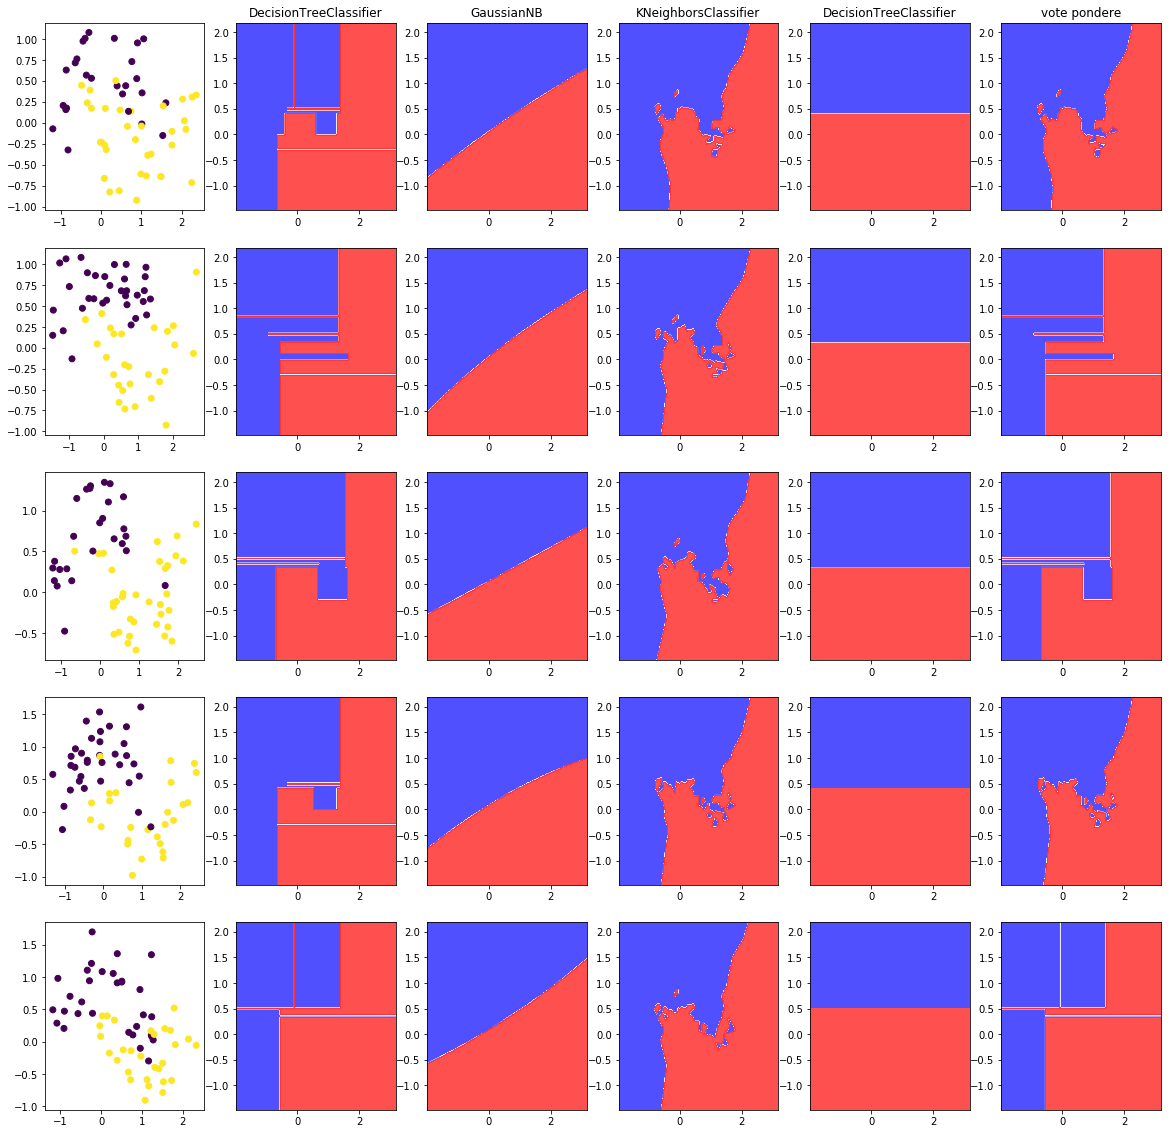

In [120]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
fusion_class = fusion_vote_maj_binary

n_plis = 5
n_classifieurs = 4
n = 300
plis_niv1 =  generer_plis(n,n_plis)
plt.figure(figsize=(20,20))
r = 100
for i in range(n_plis):
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,0),(n_plis,n_classifieurs +1 +1)) + 1)
    plt.scatter(Y[:,0][plis==i],Y[:,1][plis==i],c=c[plis==i])
    ### Deuxième etage 
    plis_niv2 = generer_plis((plis_niv1!=i).sum(),n_plis)
    errors = np.zeros((n_plis, n_classifieurs))
    for j in range(n_plis):
        for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i][plis_niv2!=j],c[plis_niv1!=i][plis_niv2!=j])
            error = clf.score(Y[plis_niv1!=i][plis_niv2==j],c[plis_niv1!=i][plis_niv2==j])
            errors[j, k] = error
    wi = errors.mean(axis = 0)
    
    ### Premier Etage
    for k in range(n_classifieurs):
            clf = classifieurs[k]
            clf.fit(Y[plis_niv1!=i],c[plis_niv1!=i])
    fusion = fusion_vote_maj_binary(classifieurs, pondere = False, is_train=True)
    # parcourt des plis
        # On affiche les données d'entraînement

    # parcourt des classifieurs
    for j in range(n_classifieurs):
        classifieurs[j].fit(Y[plis!=i],c[plis!=i])
        plt.subplot(n_plis, n_classifieurs +1+1,np.ravel_multi_index((i,j+1),(n_plis,n_classifieurs +1+1)) + 1)
        afficher(classifieurs[j], Y)
        if i == 0:
            plt.title(str(classifieurs[j]).split('(')[0])
    # frontière de décision de la fusion
    fusion = fusion_vote_maj_binary(classifieurs, pondere = True, ponderations = list(softmax(wi,r)), is_train=True)
    plt.subplot(n_plis, n_classifieurs +1 +1,np.ravel_multi_index((i,n_classifieurs +1),(n_plis,n_classifieurs +1 +1)) + 1)
    afficher(fusion, Y)
    if i == 0:
            plt.title("vote pondere")